In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load Dataset
df = pd.read_csv("game_scores.csv")
df=pd.DataFrame(df)

#Sütun analiz ve istatistikleri

In [3]:
df


,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS
0,0,21701214,04/10/2018,2017-18,Hawks,76ers,0,1,41,43,...,27,29,10,7,10,18,3,8,113,121
1,1,21701202,04/08/2018,2017-18,Celtics,Hawks,0,1,42,43,...,33,23,9,7,12,13,6,4,106,112
2,2,21701184,04/06/2018,2017-18,Wizards,Hawks,0,1,35,38,...,18,24,8,5,12,18,4,5,97,103
3,3,21701172,04/04/2018,2017-18,Hawks,Heat,0,1,33,42,...,20,23,5,9,16,12,6,10,86,115
4,4,21701158,04/03/2018,2017-18,Heat,Hawks,1,0,41,37,...,22,24,10,10,14,18,8,1,101,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,7054,22200052,10/25/2022,2022-23,Wizards,Pistons,1,0,44,36,...,26,12,7,6,12,13,7,1,120,99
7055,7055,22200992,03/09/2023,2022-23,Pistons,Hornets,0,1,40,43,...,20,24,5,11,19,13,4,9,103,113
7056,7056,22200919,02/27/2023,2022-23,Hornets,Pistons,1,0,43,42,...,24,18,8,12,17,9,3,3,117,106
7057,7057,22200785,02/03/2023,2022-23,Pistons,Hornets,1,0,44,40,...,27,22,7,16,23,14,3,2,118,112


In [4]:
df.head()

,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS
0,0,21701214,04/10/2018,2017-18,Hawks,76ers,0,1,41,43,...,27,29,10,7,10,18,3,8,113,121
1,1,21701202,04/08/2018,2017-18,Celtics,Hawks,0,1,42,43,...,33,23,9,7,12,13,6,4,106,112
2,2,21701184,04/06/2018,2017-18,Wizards,Hawks,0,1,35,38,...,18,24,8,5,12,18,4,5,97,103
3,3,21701172,04/04/2018,2017-18,Hawks,Heat,0,1,33,42,...,20,23,5,9,16,12,6,10,86,115
4,4,21701158,04/03/2018,2017-18,Heat,Hawks,1,0,41,37,...,22,24,10,10,14,18,8,1,101,98


In [5]:
df.tail()

,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS
7054,7054,22200052,10/25/2022,2022-23,Wizards,Pistons,1,0,44,36,...,26,12,7,6,12,13,7,1,120,99
7055,7055,22200992,03/09/2023,2022-23,Pistons,Hornets,0,1,40,43,...,20,24,5,11,19,13,4,9,103,113
7056,7056,22200919,02/27/2023,2022-23,Hornets,Pistons,1,0,43,42,...,24,18,8,12,17,9,3,3,117,106
7057,7057,22200785,02/03/2023,2022-23,Pistons,Hornets,1,0,44,40,...,27,22,7,16,23,14,3,2,118,112
7058,7058,22200414,12/14/2022,2022-23,Hornets,Pistons,0,1,47,48,...,21,25,7,0,5,16,6,8,134,141


In [6]:
df.dtypes

Unnamed: 0          int64
MATCHID             int64
DATE               object
SEASON             object
HOME               object
AWAY               object
W_HOME              int64
W_AWAY              int64
HOME_FG             int64
AWAY_FG             int64
HOME_FGA            int64
AWAY_FGA            int64
HOME_FG_PCT       float64
AWAY_FG_PCT       float64
HOME_FG3            int64
AWAY_FG3            int64
HOME_FG3A           int64
AWAY_FG3A           int64
HOME_FG3_PCT      float64
AWAY_FG3_PCT      float64
HOME_FT             int64
AWAY_FT             int64
HOME_FTA            int64
AWAY_FTA            int64
HOME_FT_PCT       float64
AWAY_FT_PCT       float64
HOME_OFF_REB        int64
AWAY_OFF_REB        int64
HOME_DEF_REB        int64
AWAY_DEF_REB        int64
HOME_TOT_REB        int64
AWAY_TOT_REB        int64
HOME_AST            int64
AWAY_AST            int64
HOME_STL            int64
AWAY_STL            int64
HOME_TURNOVERS      int64
AWAY_TURNOVERS      int64
HOME_BLK    

In [7]:
df.columns

Index(['Unnamed: 0', 'MATCHID', 'DATE', 'SEASON', 'HOME', 'AWAY', 'W_HOME',
       'W_AWAY', 'HOME_FG', 'AWAY_FG', 'HOME_FGA', 'AWAY_FGA', 'HOME_FG_PCT',
       'AWAY_FG_PCT', 'HOME_FG3', 'AWAY_FG3', 'HOME_FG3A', 'AWAY_FG3A',
       'HOME_FG3_PCT', 'AWAY_FG3_PCT', 'HOME_FT', 'AWAY_FT', 'HOME_FTA',
       'AWAY_FTA', 'HOME_FT_PCT', 'AWAY_FT_PCT', 'HOME_OFF_REB',
       'AWAY_OFF_REB', 'HOME_DEF_REB', 'AWAY_DEF_REB', 'HOME_TOT_REB',
       'AWAY_TOT_REB', 'HOME_AST', 'AWAY_AST', 'HOME_STL', 'AWAY_STL',
       'HOME_TURNOVERS', 'AWAY_TURNOVERS', 'HOME_BLK', 'AWAY_BLK', 'HOME_PTS',
       'AWAY_PTS'],
      dtype='object')

In [8]:
# Returns how many null values are in the column
df.isnull().sum()

Unnamed: 0        0
MATCHID           0
DATE              0
SEASON            0
HOME              0
AWAY              0
W_HOME            0
W_AWAY            0
HOME_FG           0
AWAY_FG           0
HOME_FGA          0
AWAY_FGA          0
HOME_FG_PCT       0
AWAY_FG_PCT       0
HOME_FG3          0
AWAY_FG3          0
HOME_FG3A         0
AWAY_FG3A         0
HOME_FG3_PCT      0
AWAY_FG3_PCT      0
HOME_FT           0
AWAY_FT           0
HOME_FTA          0
AWAY_FTA          0
HOME_FT_PCT       0
AWAY_FT_PCT       0
HOME_OFF_REB      0
AWAY_OFF_REB      0
HOME_DEF_REB      0
AWAY_DEF_REB      0
HOME_TOT_REB      0
AWAY_TOT_REB      0
HOME_AST          0
AWAY_AST          0
HOME_STL          0
AWAY_STL          0
HOME_TURNOVERS    0
AWAY_TURNOVERS    0
HOME_BLK          0
AWAY_BLK          0
HOME_PTS          0
AWAY_PTS          0
dtype: int64

<Axes: >

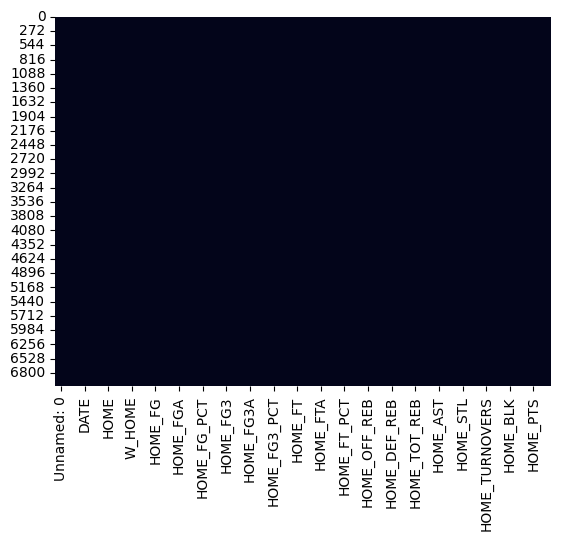

In [9]:
sns.heatmap(df.isnull(),cbar=False)

In [10]:
# Calculate statistics for all columns
statistics = df.describe(include='all')

In [11]:
# Show data types and missing values of columns
data_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7059 non-null   int64  
 1   MATCHID         7059 non-null   int64  
 2   DATE            7059 non-null   object 
 3   SEASON          7059 non-null   object 
 4   HOME            7059 non-null   object 
 5   AWAY            7059 non-null   object 
 6   W_HOME          7059 non-null   int64  
 7   W_AWAY          7059 non-null   int64  
 8   HOME_FG         7059 non-null   int64  
 9   AWAY_FG         7059 non-null   int64  
 10  HOME_FGA        7059 non-null   int64  
 11  AWAY_FGA        7059 non-null   int64  
 12  HOME_FG_PCT     7059 non-null   float64
 13  AWAY_FG_PCT     7059 non-null   float64
 14  HOME_FG3        7059 non-null   int64  
 15  AWAY_FG3        7059 non-null   int64  
 16  HOME_FG3A       7059 non-null   int64  
 17  AWAY_FG3A       7059 non-null   i

In [12]:
# Get statistics of columns
column_stats = df.describe(include='all')
print(column_stats)

         Unnamed: 0       MATCHID        DATE   SEASON  HOME   AWAY  \
count   7059.000000  7.059000e+03        7059     7059  7059   7059   
unique          NaN           NaN         955        6    30     30   
top             NaN           NaN  04/10/2022  2017-18  Suns  76ers   
freq            NaN           NaN          15     1230   239    238   
mean    3529.000000  2.195074e+07         NaN      NaN   NaN    NaN   
std     2037.902108  1.743087e+05         NaN      NaN   NaN    NaN   
min        0.000000  2.170000e+07         NaN      NaN   NaN    NaN   
25%     1764.500000  2.180054e+07         NaN      NaN   NaN    NaN   
50%     3529.000000  2.200001e+07         NaN      NaN   NaN    NaN   
75%     5293.500000  2.210070e+07         NaN      NaN   NaN    NaN   
max     7058.000000  2.220123e+07         NaN      NaN   NaN    NaN   

             W_HOME       W_AWAY      HOME_FG      AWAY_FG  ...     HOME_AST  \
count   7059.000000  7059.000000  7059.000000  7059.000000  ...  70

In [13]:
df.nunique()

Unnamed: 0        7059
MATCHID           7059
DATE               955
SEASON               6
HOME                30
AWAY                30
W_HOME               2
W_AWAY               2
HOME_FG             41
AWAY_FG             37
HOME_FGA            55
AWAY_FGA            57
HOME_FG_PCT        302
AWAY_FG_PCT        288
HOME_FG3            28
AWAY_FG3            29
HOME_FG3A           53
AWAY_FG3A           50
HOME_FG3_PCT       338
AWAY_FG3_PCT       328
HOME_FT             42
AWAY_FT             41
HOME_FTA            48
AWAY_FTA            50
HOME_FT_PCT        269
AWAY_FT_PCT        260
HOME_OFF_REB        26
AWAY_OFF_REB        28
HOME_DEF_REB        40
AWAY_DEF_REB        41
HOME_TOT_REB        53
AWAY_TOT_REB        53
HOME_AST            36
AWAY_AST            37
HOME_STL            23
AWAY_STL            20
HOME_TURNOVERS      29
AWAY_TURNOVERS      29
HOME_BLK            19
AWAY_BLK            17
HOME_PTS            86
AWAY_PTS            90
dtype: int64

In [14]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['DATE', 'SEASON', 'HOME', 'AWAY'], dtype='object')




---

#Veri Ön İşleme

In [15]:
#Yinelenen satırları kaldırma
df.drop_duplicates()

,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS
0,0,21701214,04/10/2018,2017-18,Hawks,76ers,0,1,41,43,...,27,29,10,7,10,18,3,8,113,121
1,1,21701202,04/08/2018,2017-18,Celtics,Hawks,0,1,42,43,...,33,23,9,7,12,13,6,4,106,112
2,2,21701184,04/06/2018,2017-18,Wizards,Hawks,0,1,35,38,...,18,24,8,5,12,18,4,5,97,103
3,3,21701172,04/04/2018,2017-18,Hawks,Heat,0,1,33,42,...,20,23,5,9,16,12,6,10,86,115
4,4,21701158,04/03/2018,2017-18,Heat,Hawks,1,0,41,37,...,22,24,10,10,14,18,8,1,101,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,7054,22200052,10/25/2022,2022-23,Wizards,Pistons,1,0,44,36,...,26,12,7,6,12,13,7,1,120,99
7055,7055,22200992,03/09/2023,2022-23,Pistons,Hornets,0,1,40,43,...,20,24,5,11,19,13,4,9,103,113
7056,7056,22200919,02/27/2023,2022-23,Hornets,Pistons,1,0,43,42,...,24,18,8,12,17,9,3,3,117,106
7057,7057,22200785,02/03/2023,2022-23,Pistons,Hornets,1,0,44,40,...,27,22,7,16,23,14,3,2,118,112


In [16]:
#Label Encoding 
label_encoder = LabelEncoder()
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].apply(label_encoder.fit_transform)

# Filling in missing values by averaging integer values
integer_columns = df.select_dtypes(include=['int', 'float']).columns
df[integer_columns] = df[integer_columns].fillna(df[integer_columns].mean())
        
# Filling missing values with "Unknown" in String values
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns] = df[string_columns].fillna("Unknown")

In [17]:
df

,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS
0,0,21701214,527,0,7,0,0,1,41,43,...,27,29,10,7,10,18,3,8,113,121
1,1,21701202,518,0,4,7,0,1,42,43,...,33,23,9,7,12,13,6,4,106,112
2,2,21701184,508,0,29,7,0,1,35,38,...,18,24,8,5,12,18,4,5,97,103
3,3,21701172,499,0,7,8,0,1,33,42,...,20,23,5,9,16,12,6,10,86,115
4,4,21701158,495,0,8,7,1,0,41,37,...,22,24,10,10,14,18,8,1,101,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,7054,22200052,621,5,29,20,1,0,44,36,...,26,12,7,6,12,13,7,1,120,99
7055,7055,22200992,373,5,20,9,0,1,40,43,...,20,24,5,11,19,13,4,9,103,113
7056,7056,22200919,317,5,9,20,1,0,43,42,...,24,18,8,12,17,9,3,3,117,106
7057,7057,22200785,203,5,20,9,1,0,44,40,...,27,22,7,16,23,14,3,2,118,112


#K - Means Kümeleme

In [18]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_features]

# Ölçeklendirme işlemi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means modelini oluşturun ve uygulayın
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Küme etiketlerini alın
labels = kmeans.labels_

# Orijinal veri çerçevesine küme etiketlerini ekleyin
df["Cluster"] = labels

# Kümeleme sonuçlarını görüntüleyin
cluster_counts = df["Cluster"].value_counts()
print(cluster_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4    1496
0    1493
1    1470
3    1436
2    1164
Name: Cluster, dtype: int64


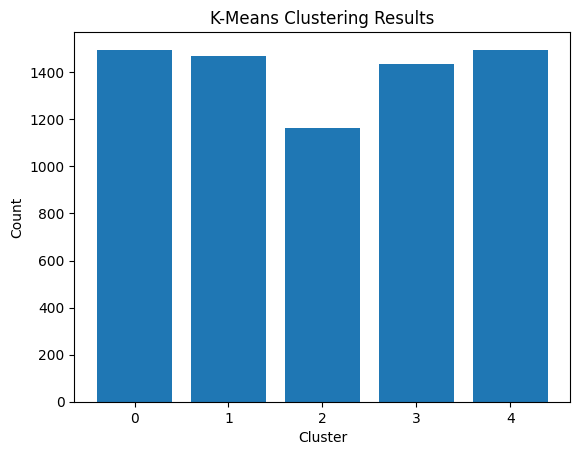

In [19]:
import matplotlib.pyplot as plt

# Küme sayısına göre kümeleme sonuçlarını görselleştirme
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('K-Means Clustering Results')
plt.show()


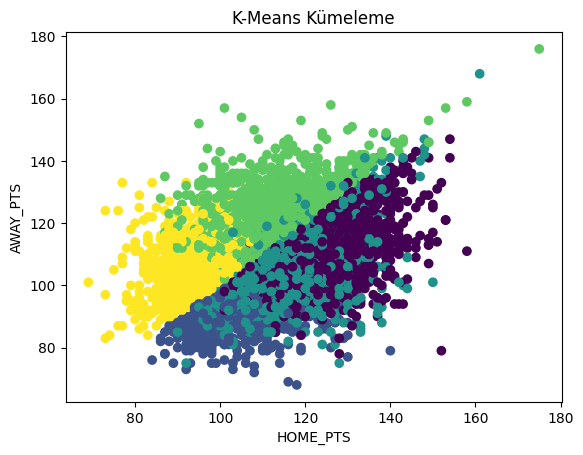

In [20]:

# Visualize clustering results
plt.scatter(df["HOME_PTS"], df["AWAY_PTS"], c=df["Cluster"])
plt.xlabel("HOME_PTS")
plt.ylabel("AWAY_PTS")
plt.title("K-Means Kümeleme")
plt.show()

In [21]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)

# Get cluster labels
labels = gmm.predict(X_scaled)

# Add the generated cluster labels to the dataframe
df["Cluster"] = labels
sonuc = df["Cluster"].value_counts()
print(sonuc)

4    2458
0    1681
2    1466
1    1374
3      80
Name: Cluster, dtype: int64


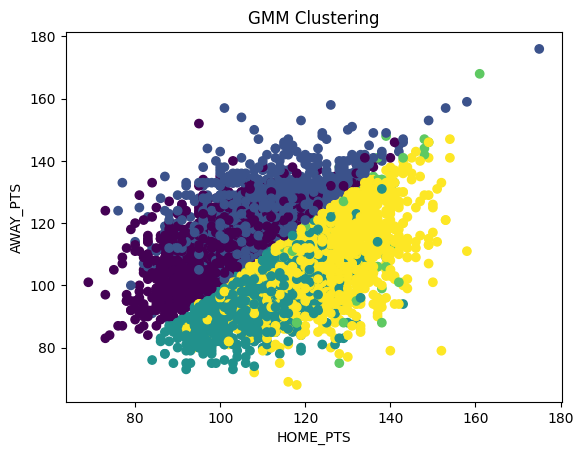

In [22]:
plt.scatter(X['HOME_PTS'], X['AWAY_PTS'], c=labels)
plt.xlabel('HOME_PTS')
plt.ylabel('AWAY_PTS')
plt.title('GMM Clustering')
plt.show()